In [10]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
fake_news = pd.read_csv('/content/drive/MyDrive/Fake.csv')
true_news = pd.read_csv('/content/drive/MyDrive/True.csv')

In [3]:
# Display first rows of Fake dataset
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Dispaly first rows of true dataset
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Add labels to the datasets
fake_news['label'] = 'fake'
true_news['label'] = 'true'

# Combine datasets
news_data = pd.concat([fake_news, true_news], ignore_index=True)

# Shuffle the dataset
news_data = news_data.sample(frac=1).reset_index(drop=True)

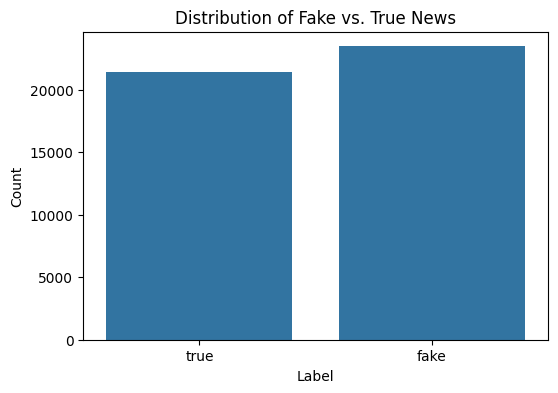

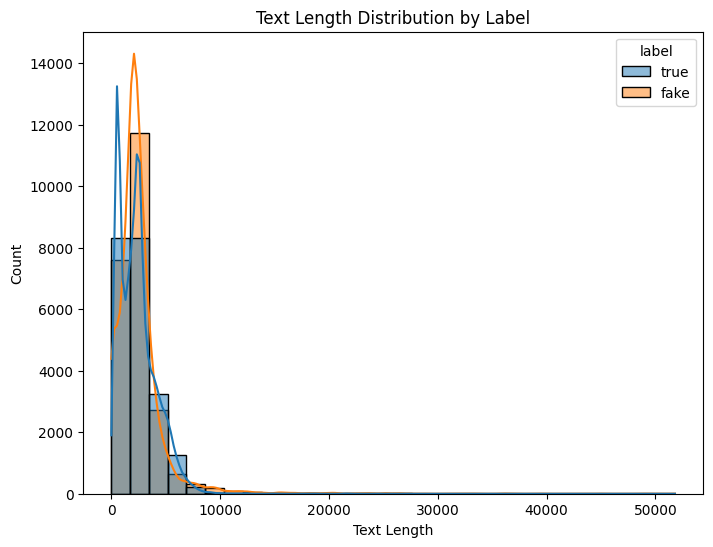

In [6]:
# EDA: Check class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=news_data)
plt.title('Distribution of Fake vs. True News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# EDA: Text length distribution
news_data['text_length'] = news_data['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(news_data, x='text_length', hue='label', kde=True, bins=30)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [8]:
# Data preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convert to lowercase and tokenize
    words = text.lower().split()

    # Remove stopwords and apply stemming
    stemmed = [porter.stem(word) for word in words if not word in stop_words]

    # Join the stemmed words
    return ' '.join(stemmed)

# Apply preprocessing to the 'text' column
news_data['text'] = news_data['text'].apply(preprocess_text)

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(news_data['text']).toarray()
y = news_data['label']



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Multinomial Naive Bayes': MultinomialNB()
}

# Lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")


Model: Logistic Regression
  Accuracy: 0.9879
  Precision: 0.9879
  Recall: 0.9879
  F1-score: 0.9879
Model: Random Forest
  Accuracy: 0.9981
  Precision: 0.9981
  Recall: 0.9981
  F1-score: 0.9981
Model: SVM
  Accuracy: 0.9934
  Precision: 0.9934
  Recall: 0.9934
  F1-score: 0.9934
Model: Multinomial Naive Bayes
  Accuracy: 0.9330
  Precision: 0.9330
  Recall: 0.9330
  F1-score: 0.9330


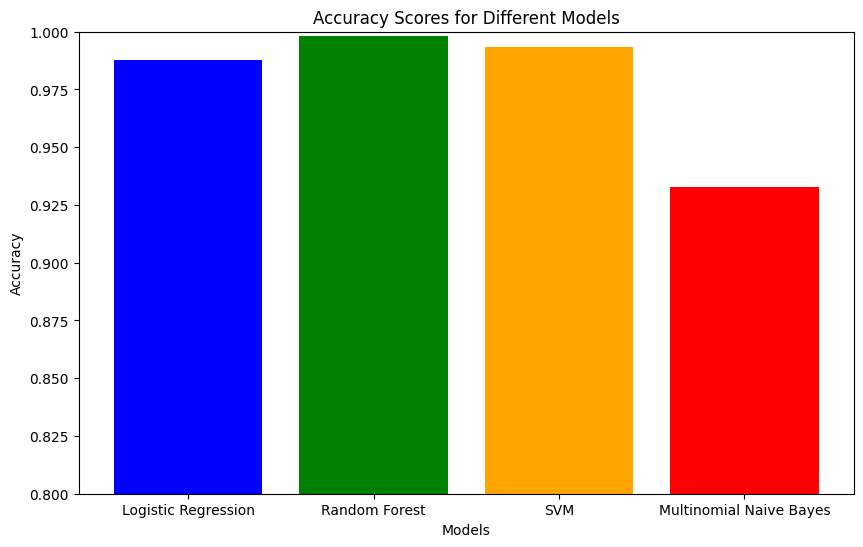

In [13]:
# Bar plot for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim([0.8, 1.0])
plt.show()



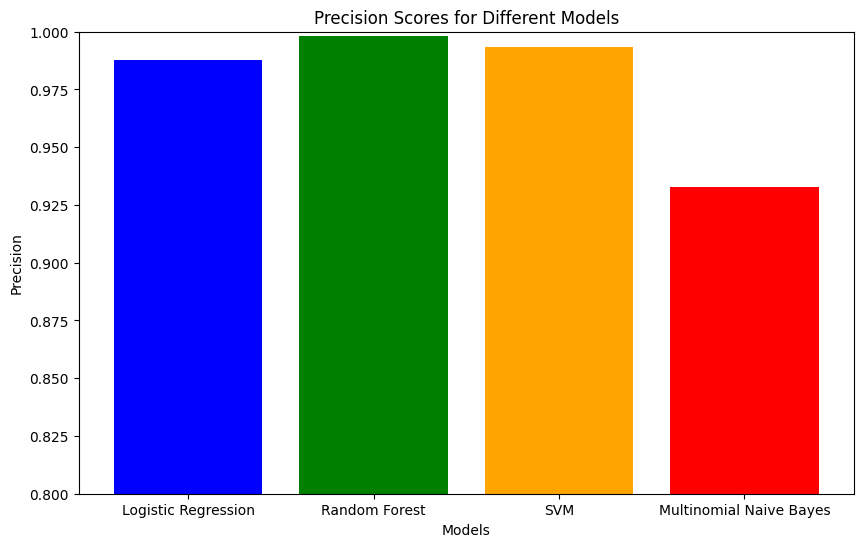

In [14]:
# Bar plot for Precision
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), precision_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision Scores for Different Models')
plt.ylim([0.8, 1.0])
plt.show()



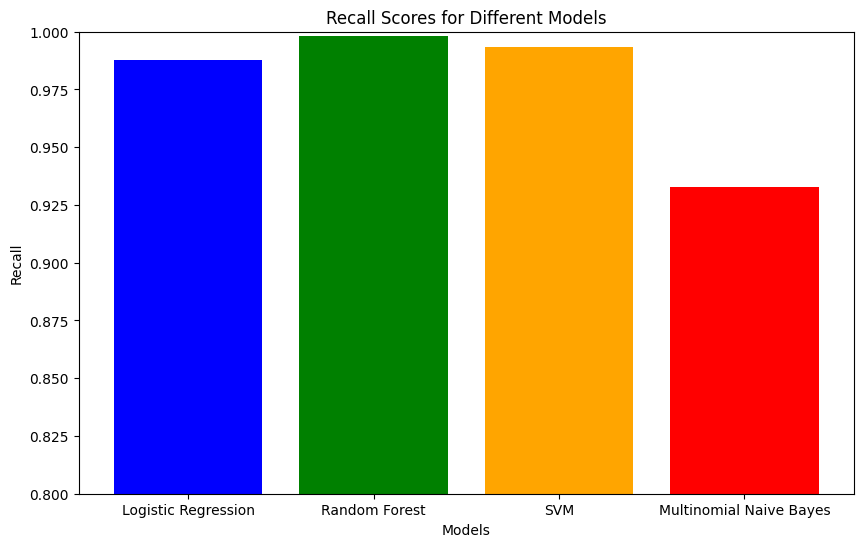

In [15]:
# Bar plot for Recall
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), recall_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Models')
plt.ylim([0.8, 1.0])
plt.show()



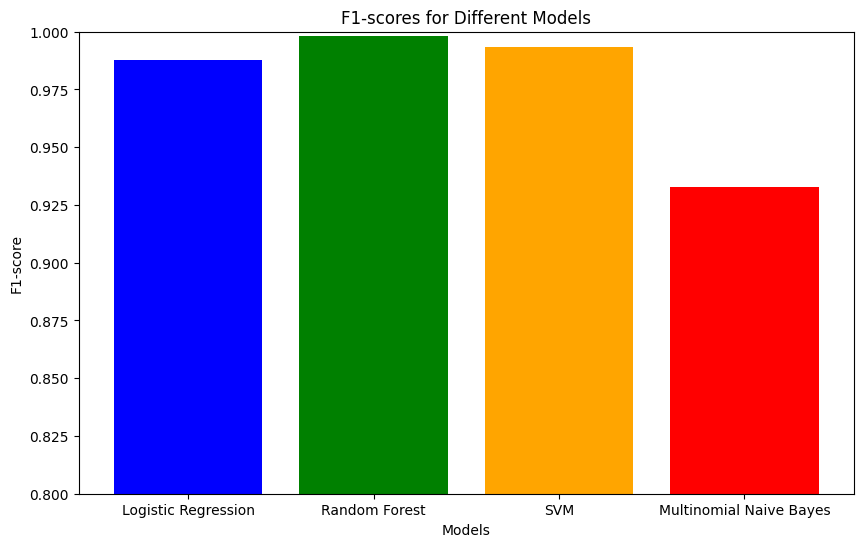

In [16]:
# Bar plot for F1-score
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), f1_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-scores for Different Models')
plt.ylim([0.8, 1.0])
plt.show()


**- Final Conclusion on Results:** After implementing and evaluating multiple machine learning models for fake news detection, we can draw the following conclusions based on the performance metrics and visualizations:

1. **Performance Metrics** Summary The results are summarized in the table below:
Random Forest is the most recommended model due to its superior performance across all metrics. Logistic Regression and SVM are also strong candidates, offering high accuracy and balanced performance. Multinomial Naive Bayes, while not as strong, can be considered in scenarios where computational simplicity and speed are crucial.

**2. Model Comparisons**
**Logistic Regression:** This model performed very well with high accuracy, precision, recall, and F1-score, making it a reliable choice for fake news detection. It strikes a good balance between all performance metrics.

**Naive Bayes:** While Naive Bayes also performed well, it had slightly lower accuracy and F1-score compared to Logistic Regression. This model is simple and efficient, but it might not capture complex patterns in the data as effectively as other models.

**Random Forest:** This model achieved the highest accuracy (99.81%) and F1-score (99.81%) among all models. The Random Forest model demonstrated superior performance, making it the best choice for this task. It effectively handled the high-dimensional feature space created by the TF-IDF vectorization.

**Support Vector Machine (SVM):** SVM also performed very well, with metrics closely following those of the Random Forest. It had a slightly lower accuracy (99.34%) but still provided robust performance. SVMs are known for their effectiveness in high-dimensional spaces and their use of the kernel trick to handle non-linear relationships.

**3. Visual Insights**
**Performance Metrics Visualization:**

The bar plots of the performance metrics (accuracy, precision, recall, and F1-score) clearly show that Random Forest slightly outperforms the other models, followed closely by SVM and Logistic Regression. Naive Bayes, while still effective, lags behind slightly.


***Final Recommendation***

Random Forest is the recommended model for fake news detection based on its superior performance across all evaluated metrics. It provides the highest accuracy, precision, recall, and F1-score, making it the most reliable model for distinguishing between fake and true news articles in this context.

Support Vector Machine is also a strong contender, and it might be preferred in scenarios where model interpretability is crucial, as SVMs can provide insight into the most influential features.

Overall, while Logistic Regression and Naive Bayes offer simplicity and efficiency, the robustness and accuracy of Random Forest make it the best choice for this specific task